In [ ]:
#card classifier
#Source: https://www.kaggle.com/code/robikscube/train-your-first-pytorch-model-card-classifier

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm

import matplotlib.pyplot as plt # For data viz
import pandas as pd
import numpy as np
import sys
from tqdm.notebook import tqdm

print('System Version:', sys.version)
print('PyTorch version', torch.__version__)
print('Torchvision version', torchvision.__version__)
print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)

System Version: 3.9.20 (main, Oct 23 2024, 09:34:14) 
[GCC 8.5.0 20210514 (Red Hat 8.5.0-22)]
PyTorch version 2.5.1+cu124
Torchvision version 0.20.1+cu124
Numpy version 2.0.2
Pandas version 2.2.3


In [3]:
#Step 1. Pytorch Dataset (and Dataloader)
class PlayingCardDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data = ImageFolder(data_dir, transform=transform)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]
    
    @property
    def classes(self):
        return self.data.classes

In [4]:
dataset = PlayingCardDataset(
    data_dir='path/to/train'
)

In [5]:
len(dataset)

7624

0


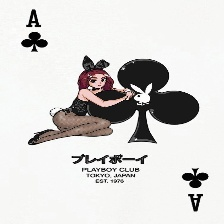

In [7]:
image, label = dataset[1]
print(label)
image

In [8]:
# Get a dictionary associating target values with folder names
data_dir = '/path/to/train'
target_to_class = {v: k for k, v in ImageFolder(data_dir).class_to_idx.items()}
print(target_to_class)

{0: 'ace of clubs', 1: 'ace of diamonds', 2: 'ace of hearts', 3: 'ace of spades', 4: 'eight of clubs', 5: 'eight of diamonds', 6: 'eight of hearts', 7: 'eight of spades', 8: 'five of clubs', 9: 'five of diamonds', 10: 'five of hearts', 11: 'five of spades', 12: 'four of clubs', 13: 'four of diamonds', 14: 'four of hearts', 15: 'four of spades', 16: 'jack of clubs', 17: 'jack of diamonds', 18: 'jack of hearts', 19: 'jack of spades', 20: 'joker', 21: 'king of clubs', 22: 'king of diamonds', 23: 'king of hearts', 24: 'king of spades', 25: 'nine of clubs', 26: 'nine of diamonds', 27: 'nine of hearts', 28: 'nine of spades', 29: 'queen of clubs', 30: 'queen of diamonds', 31: 'queen of hearts', 32: 'queen of spades', 33: 'seven of clubs', 34: 'seven of diamonds', 35: 'seven of hearts', 36: 'seven of spades', 37: 'six of clubs', 38: 'six of diamonds', 39: 'six of hearts', 40: 'six of spades', 41: 'ten of clubs', 42: 'ten of diamonds', 43: 'ten of hearts', 44: 'ten of spades', 45: 'three of clu

In [9]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])
data_dir = '/path/to/train'
dataset = PlayingCardDataset(data_dir, transform)

In [11]:
image, label = dataset[5]
print(label)
image


0


tensor([[[0.1137, 0.3412, 0.7451,  ..., 0.9294, 0.7765, 0.4000],
         [0.4039, 0.7882, 0.9176,  ..., 0.9373, 0.9333, 0.8431],
         [0.8431, 0.9176, 0.9255,  ..., 0.9490, 0.9451, 0.9333],
         ...,
         [0.9255, 0.9333, 0.9490,  ..., 0.9412, 0.9412, 0.9373],
         [0.7608, 0.9137, 0.9373,  ..., 0.9451, 0.9412, 0.9490],
         [0.3569, 0.7804, 0.9333,  ..., 0.9451, 0.9333, 0.8941]],

        [[0.2353, 0.4392, 0.8039,  ..., 0.9412, 0.8000, 0.4314],
         [0.4902, 0.8549, 0.9529,  ..., 0.9451, 0.9529, 0.8706],
         [0.8745, 0.9451, 0.9294,  ..., 0.9529, 0.9529, 0.9490],
         ...,
         [0.9529, 0.9490, 0.9490,  ..., 0.9412, 0.9412, 0.9373],
         [0.8039, 0.9451, 0.9451,  ..., 0.9490, 0.9451, 0.9569],
         [0.4078, 0.8196, 0.9490,  ..., 0.9490, 0.9412, 0.9020]],

        [[0.1451, 0.3569, 0.7333,  ..., 0.8863, 0.7373, 0.3647],
         [0.4118, 0.7843, 0.8902,  ..., 0.8902, 0.8941, 0.8078],
         [0.8157, 0.8902, 0.8784,  ..., 0.9020, 0.8980, 0.

In [ ]:
# iterate over dataset
for image, label in dataset:
    break

In [ ]:
#Dataloaders
#Batch operation

In [12]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [13]:
for images, labels in dataloader:
    break

In [14]:
images.shape, labels.shape

(torch.Size([32, 3, 128, 128]), torch.Size([32]))

In [15]:
labels

tensor([16, 10,  1, 34, 16, 18,  0, 48, 36, 10, 40,  0, 11, 42,  5, 39, 15, 18,
        22,  3, 40, 35, 11, 25,  6, 19, 14, 13,  9, 39, 27, 11])

In [ ]:
#PyTorch Model
#Using Timm

In [16]:
#Efficient
class SimpleCardClassifer(nn.Module):
    def __init__(self, num_classes=53):
        super(SimpleCardClassifer, self).__init__()
        # Where we define all the parts of the model
        self.base_model = timm.create_model('efficientnet_b0', pretrained=True)
        self.features = nn.Sequential(*list(self.base_model.children())[:-1])

        enet_out_size = 1280
        # Make a classifier
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(enet_out_size, num_classes)
        )
    
    def forward(self, x):
        # Connect these parts and return the output
        x = self.features(x)
        output = self.classifier(x)
        return output

In [17]:
model = SimpleCardClassifer(num_classes=53)
# print(str(model)[:500])

model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

In [18]:
example_out = model(images)
example_out.shape 

torch.Size([32, 53])

In [ ]:
#Training Loop

In [19]:
# Loss function
criterion = nn.CrossEntropyLoss()
# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [20]:
criterion(example_out, labels)
print(example_out.shape, labels.shape)

torch.Size([32, 53]) torch.Size([32])


In [21]:
#Setup Dataset
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

train_folder = '/path/to/train/'
valid_folder = '/path/to/valid/'
test_folder = '/path/to/test/'

train_dataset = PlayingCardDataset(train_folder, transform=transform)
val_dataset = PlayingCardDataset(valid_folder, transform=transform)
test_dataset = PlayingCardDataset(test_folder, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [22]:
# Simple training loop
num_epochs = 5
train_losses, val_losses = [], []

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = SimpleCardClassifer(num_classes=53)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc='Training loop'):
        # Move inputs and labels to the device
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * labels.size(0)
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)
    
    # Validation phase
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc='Validation loop'):
            # Move inputs and labels to the device
            images, labels = images.to(device), labels.to(device)
         
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * labels.size(0)
    val_loss = running_loss / len(val_loader.dataset)
    val_losses.append(val_loss)
    print(f"Epoch {epoch+1}/{num_epochs} - Train loss: {train_loss}, Validation loss: {val_loss}")

Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 1/5 - Train loss: 1.5743265040648822, Validation loss: 0.49711172771903706


Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 2/5 - Train loss: 0.5759760866260228, Validation loss: 0.22570644234711268


Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 3/5 - Train loss: 0.3418551647228434, Validation loss: 0.1628151335806217


Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 4/5 - Train loss: 0.21979736102840708, Validation loss: 0.18411936872410326


Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 5/5 - Train loss: 0.21215296295888778, Validation loss: 0.16277669015920387


In [23]:
# Visualize Losses

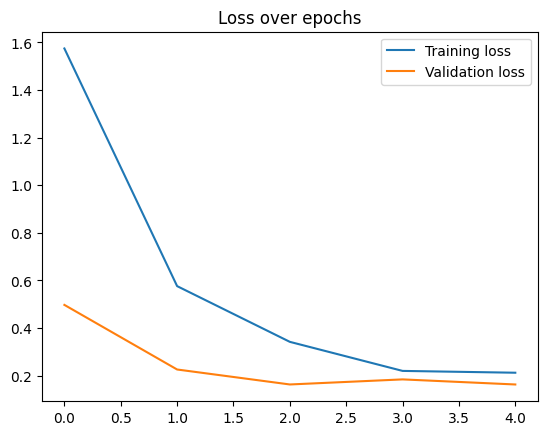

In [24]:
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.title("Loss over epochs")
plt.show()

In [27]:
#printing accuracy on test set
def evaluate_accuracy(model, data_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, dim=1)  # Get predicted class
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    return correct / total


In [28]:
test_acc = evaluate_accuracy(model, test_loader, device)
print(f"Test Accuracy: {test_acc:.4f}")


Test Accuracy: 0.9547
